# 视频处理

# 1. 视频转图片

① cv2.VideoCapture 函数可以捕获摄像头，或读取视频文件。

② cv2.VideoCapture 函数入口参数：

 - 用数字来控制不同的设备(摄像头)，例如 0、1。
 - 如果是视频文件，直接指定好路径即可。

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline 

In [4]:
# 随着时间轴的变换，视频在动，虽然图像是静止的，但是图像在一帧一帧走，呈现视频的感觉

# 绘图显示(封装函数)
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
vc = cv2.VideoCapture('02_Video/00_Scenery.mp4') # 读取视频文件
if vc.isOpened():   # 检查是否打开正确
    open, frame = vc.read() # 这里的 vc.read() 相当于读取图像的第一帧
                            # 若循环不断的执行 vc.read，则不断的读取第二帧、第三帧....
    print(open) # 正常打开时，open会返回 True
    print(type(frame))
    cv_show('image_scenery',frame)
else:
    open = False

True
<class 'numpy.ndarray'>


显示结果
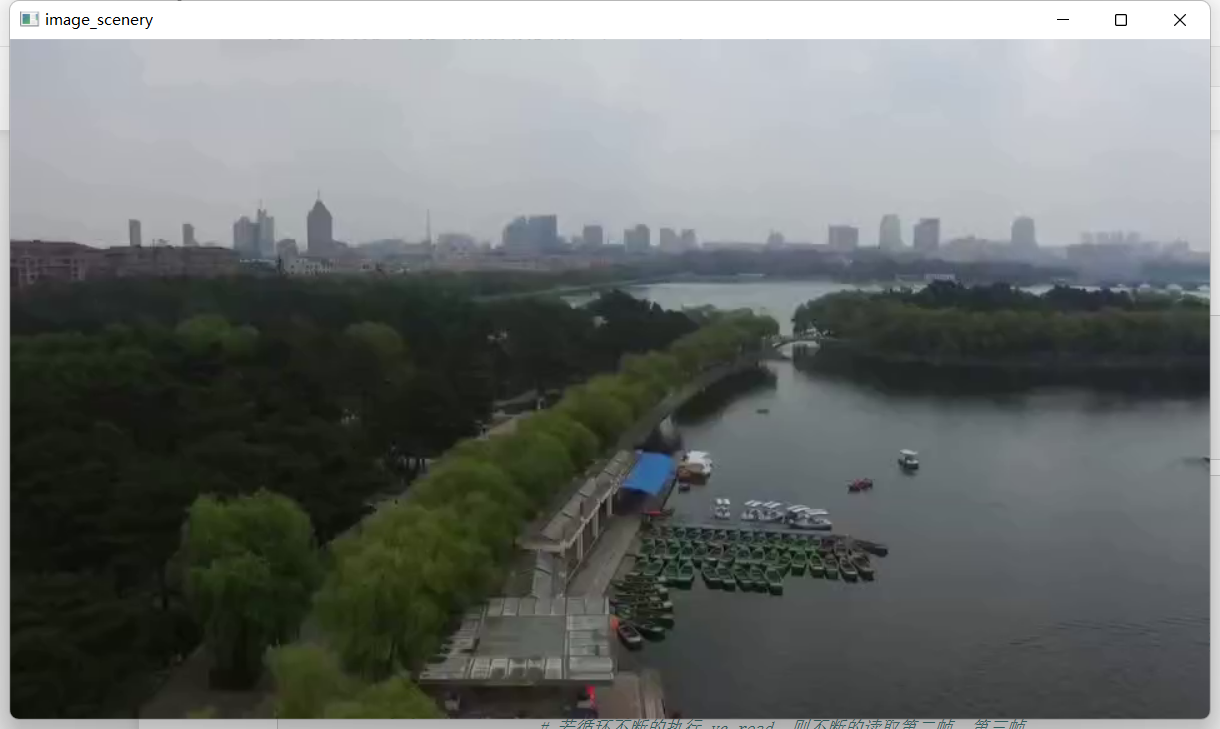

# 2. 图片转视频（循环读取每一帧图片）

In [5]:
while open: # 如果正常打开，则不停循环读取,这里可替换成 i 值，来确定读取 i 帧     
    ret, frame = vc.read()
    if frame is None: # 视频读完以后的下一帧为空
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 读取的图片转换成黑白的   
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF == 27: # cv2.waitKey(10)为等多少时间执行下一帧，0xFF为退出键ESC
            break
vc.release() # release()完成与 open() 相反的工作.释放 open() 向内核申请的所有资源
cv2.destroyAllWindows() # 销毁所有窗口